In [1]:
!pip install neuralprophet

  Using cached neuralprophet-0.3.2-py3-none-any.whl (74 kB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached torch_lr_finder-0.2.1-py3-none-any.whl (11 kB)
  Using cached torch-1.12.0-cp39-none-macosx_10_9_x86_64.whl (133.6 MB)


In [2]:
#패키지 임포트
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [3]:
df = pd.read_csv('전8_master_final_220708.csv')
df

,cartype,예정시간,배차시간,승차시간,startpos1,startpos2,endpos1,endpos2,direction,start_lat,...,end_lng,distance,duration,taxiFare,y_b_time,b_s_time,y_s_time,y_b_seconds,b_s_seconds,y_s_seconds
0,중형승합,2018-01-23 00:04:00,2018-01-23 00:18:42,2018-01-23 00:34:08,성북구,장위제1동,동대문구,회기동,장위제1동회기동,127.043713,...,37.590808,4289,648.464,5600,0 days 00:14:42,0 days 00:15:26,0 days 00:30:08,882,926,1808
1,중형승합,2018-01-23 00:17:00,2018-01-23 00:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동,면목제7동상계1동,127.086985,...,37.679901,14493,1318.675,13700,0 days 00:33:37,0 days 00:28:45,0 days 01:02:22,2017,1725,3742
2,중형승합,2018-01-23 00:17:06,2018-01-23 00:17:39,2018-01-23 00:30:00,성북구,정릉제3동,강북구,수유제3동,정릉제3동수유제3동,127.004186,...,37.638715,4869,864.161,6200,0 days 00:00:33,0 days 00:12:21,0 days 00:12:54,33,741,774
3,중형승합,2018-01-23 00:47:00,2018-01-23 00:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동,고척제2동은천동,126.858712,...,37.485309,10247,1652.785,11000,0 days 00:04:19,0 days 00:18:14,0 days 00:22:33,259,1094,1353
4,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동,회기동장위제2동,127.055313,...,37.612390,3778,598.639,5200,0 days 00:36:17,0 days 00:22:36,0 days 00:58:53,2177,1356,3533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407548,대형승용,2022-06-24 07:00:00,2022-06-24 07:12:38,2022-06-24 07:55:24,성북구,돈암제2동,강남구,대치4동,돈암제2동대치4동,127.010566,...,37.499741,15572,3581.405,18900,0 days 00:12:38,0 days 00:42:46,0 days 00:55:24,758,2566,3324
407549,중형승합,2022-06-24 07:00:00,2022-06-24 07:09:10,2022-06-24 07:25:35,은평구,구산동,은평구,구산동,구산동구산동,126.910389,...,37.611745,1000,240.000,0,0 days 00:09:10,0 days 00:16:25,0 days 00:25:35,550,985,1535
407550,중형승합,2022-06-24 07:00:00,2022-06-24 07:04:27,2022-06-24 07:25:35,노원구,상계8동,영등포구,영등포동,상계8동영등포동,127.051587,...,37.520398,47328,2667.002,45030,0 days 00:04:27,0 days 00:21:08,0 days 00:25:35,267,1268,1535
407551,중형승합,2022-06-24 06:55:01,2022-06-24 07:00:00,2022-06-24 08:06:22,성북구,길음제1동,강북구,번제1동,길음제1동번제1동,127.019392,...,37.637891,4631,772.956,6200,0 days 00:04:59,0 days 01:06:22,0 days 01:11:21,299,3982,4281


In [4]:
df['예정시간'] = pd.to_datetime(df['예정시간'])

In [5]:
df['예정시간'] = pd.to_datetime(df['예정시간'].dt.strftime('%Y-%m-%d'))

In [6]:
df = df[['예정시간', 'startpos1', 'startpos2']]

In [7]:
df

,예정시간,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동
...,...,...,...
407548,2022-06-24,성북구,돈암제2동
407549,2022-06-24,은평구,구산동
407550,2022-06-24,노원구,상계8동
407551,2022-06-24,성북구,길음제1동


In [8]:
df[df['startpos1'] == '강서구'].groupby('예정시간').count()['startpos1'].describe()

count    1637.000000
mean       22.926695
std         4.449197
min        10.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        40.000000
Name: startpos1, dtype: float64

In [9]:
df[df['startpos1'] == '강서구'].groupby('예정시간').count()['startpos1'].describe()
df.head()

,예정시간,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동


In [10]:
data = df.rename(columns = {'예정시간' : 'date'})
data[data['startpos1'] == '강서구'].groupby('date').count().describe()['startpos1']
data

,date,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동
...,...,...,...
407548,2022-06-24,성북구,돈암제2동
407549,2022-06-24,은평구,구산동
407550,2022-06-24,노원구,상계8동
407551,2022-06-24,성북구,길음제1동


In [11]:
data = data[data['startpos1'] == '강서구'].groupby('date').count()

In [12]:
data = data.reset_index()[['date', 'startpos1']]

In [13]:
data

,date,startpos1
0,2018-01-01,23
1,2018-01-02,24
2,2018-01-03,18
3,2018-01-04,21
4,2018-01-05,23
...,...,...
1632,2022-06-21,27
1633,2022-06-22,22
1634,2022-06-23,26
1635,2022-06-24,17


## 데이터 전처리 및 모델 학습

In [14]:
#train test split
cutoff = "2021-01-01"
train_df = data[data['date']<cutoff]
test_df = data[data['date']>=cutoff]

In [15]:
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [16]:
train.head()

,ds,y
0,2018-01-01,23
1,2018-01-02,24
2,2018-01-03,18
3,2018-01-04,21
4,2018-01-05,23


In [17]:
train['ds']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1091   2020-12-27
1092   2020-12-28
1093   2020-12-29
1094   2020-12-30
1095   2020-12-31
Name: ds, Length: 1096, dtype: datetime64[ns]

In [18]:
#train = train.resample('W-MON', label='right', closed = 'right', on='ds').sum().reset_index().sort_values(by='ds')
#test = test.resample('W-MON', label='right', closed = 'right', on='ds').sum().reset_index().sort_values(by='ds')

In [19]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [20]:
#모델 학습
metrics = m.fit(train, freq = 'D')

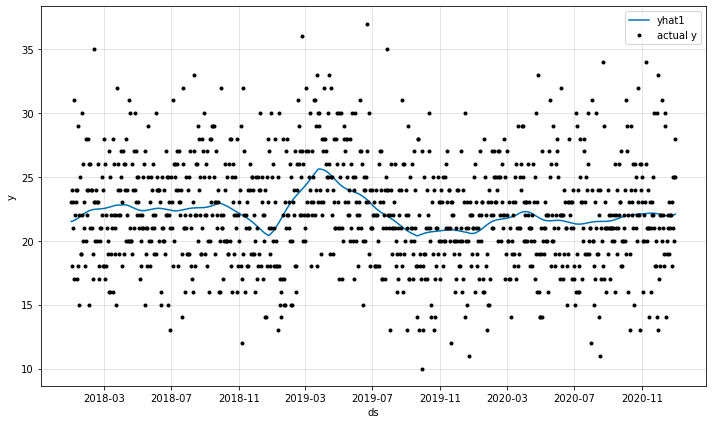

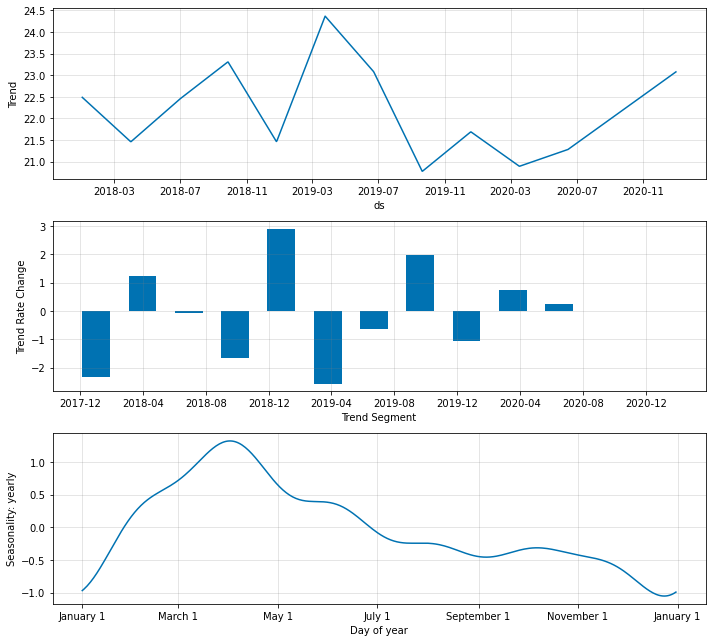

In [21]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()


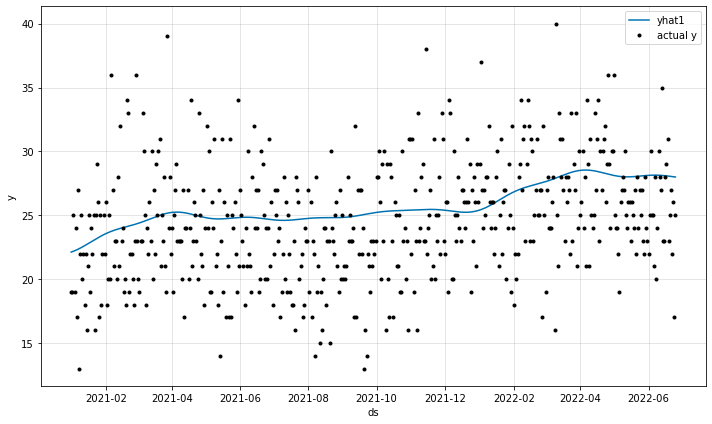

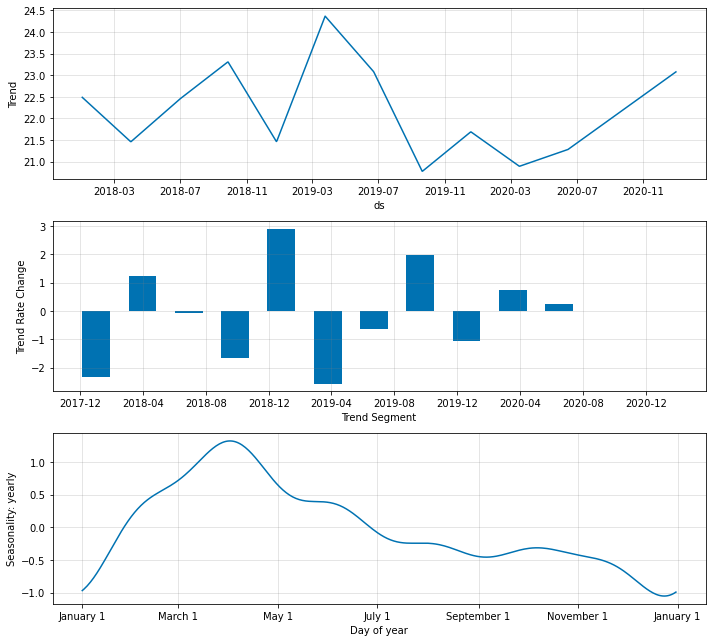

In [22]:

#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()


WARNING - (py.warnings._showwarnmsg) - /Users/minjaering/opt/anaconda3/envs/minjaering/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



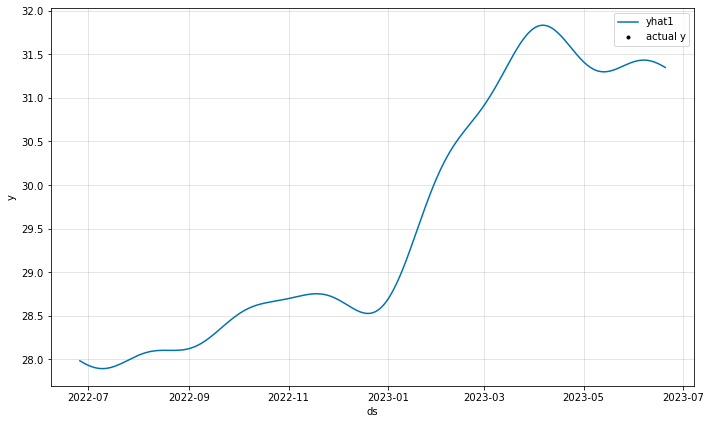

In [23]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

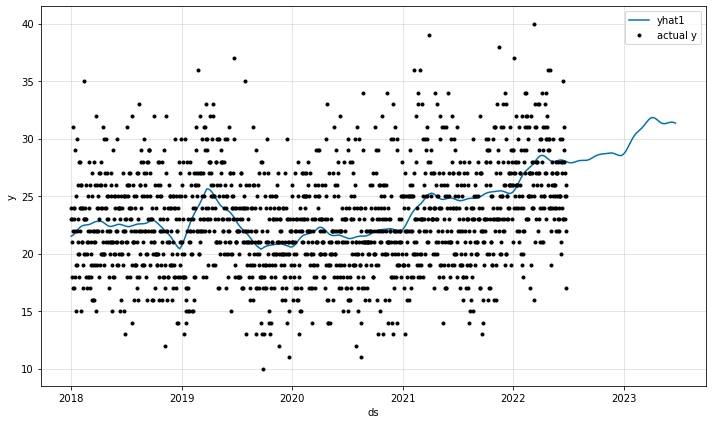

In [24]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)

## 성능평가

In [28]:
!pip install scikit-learn

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 3.1601603222589425
MSE : 16.11320783867611
RMSE : 4.014126036720336
MAPE : 0.14298785859998


In [30]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 3.628984511229115
MSE : 20.205459492262236
RMSE : 4.495048330358889
MAPE : 0.1419945211882971


## 노원구

In [31]:
data = df.rename(columns = {'예정시간' : 'date'})
data1 = data[data['startpos1'] == '노원구'].groupby('date').count()

In [32]:
data1 = data1.reset_index()[['date', 'startpos1']]

In [33]:
data1.describe()

,startpos1
count,1637.000000
mean,26.931582
std,5.351024
min,13.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,52.000000


In [34]:
#train test split
cutoff = "2020-06-01"
train_df = data1[data1['date']<cutoff]
test_df = data1[data1['date']>=cutoff]
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [35]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [36]:
#모델 학습
metrics = m.fit(train, freq = 'D')

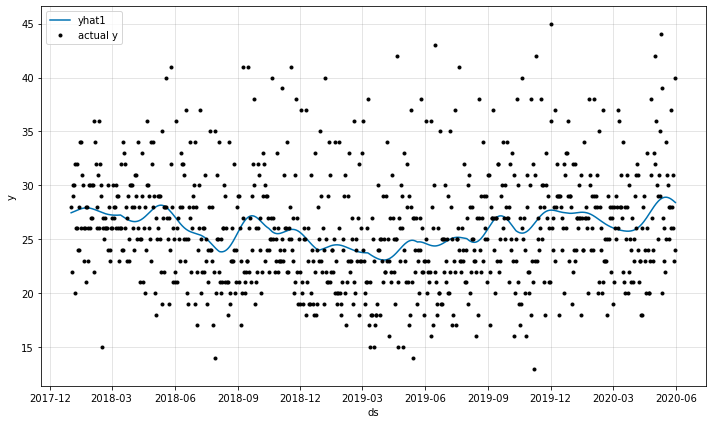

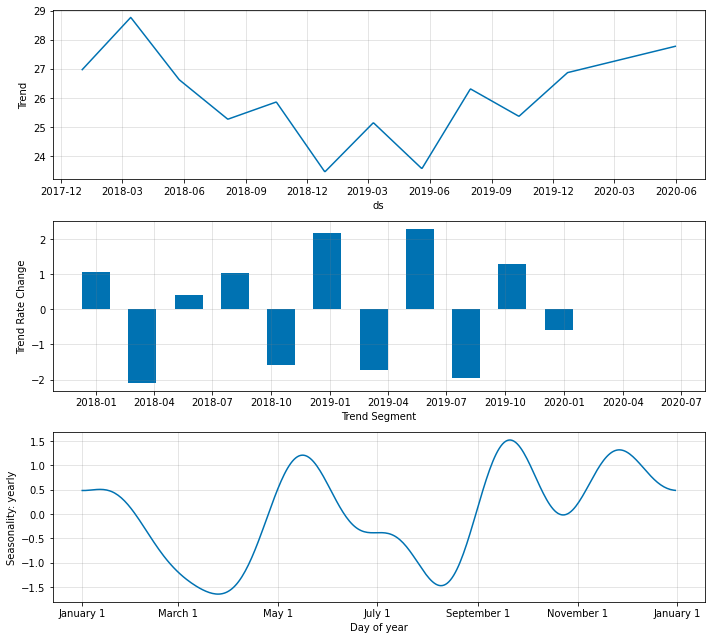

In [37]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

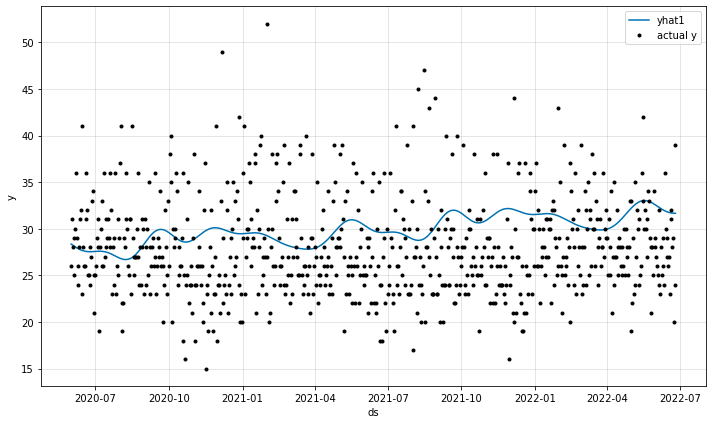

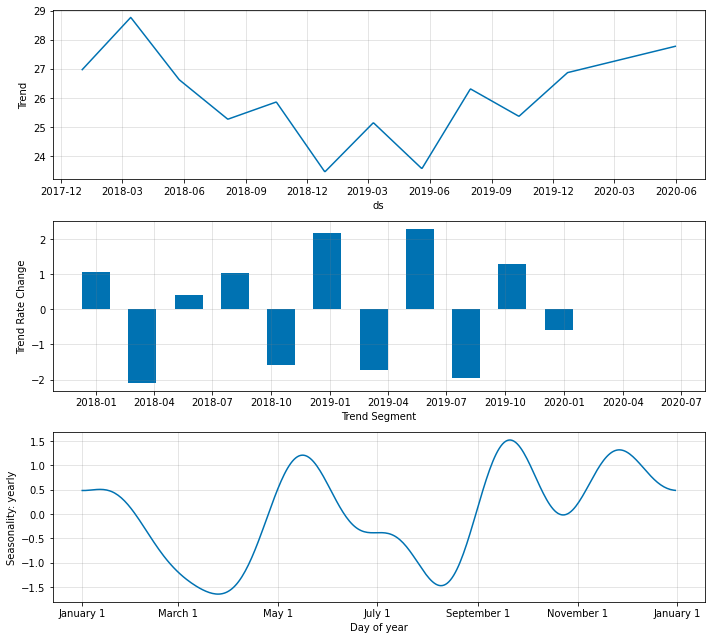

In [38]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()

WARNING - (py.warnings._showwarnmsg) - /Users/minjaering/opt/anaconda3/envs/minjaering/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



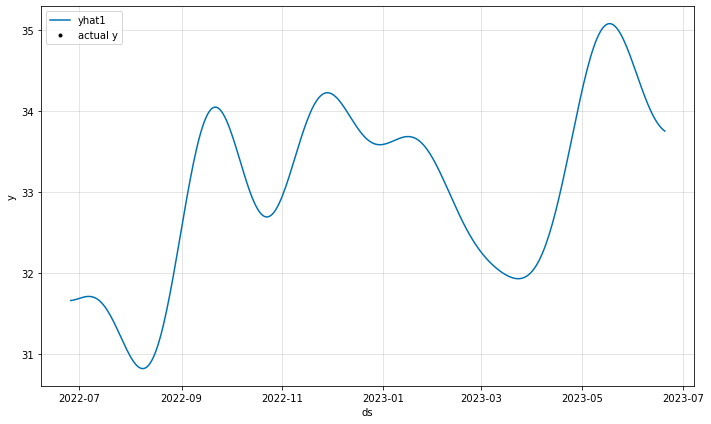

In [40]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

## 나중에 append기능 대신 pandas concat 사용하기 

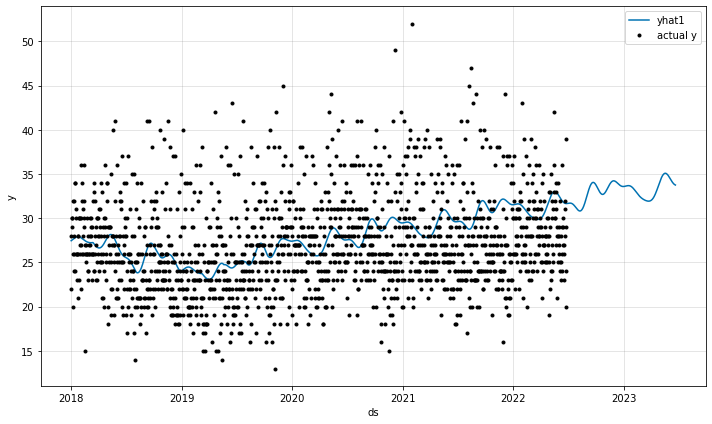

In [41]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 3.8976029506345995
MSE : 25.76760927619969
RMSE : 5.076180579549913
MAPE : 0.15080605566550367


In [43]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))


============== Appliances Evaluate Result============
MAE : 4.743061154093963
MSE : 33.64775365953304
RMSE : 5.80066838041385
MAPE : 0.15811802486055412


In [44]:
data1.describe()

,startpos1
count,1637.000000
mean,26.931582
std,5.351024
min,13.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,52.000000


## 서대문구

In [45]:
data = df.rename(columns = {'예정시간' : 'date'})
data2 = data[data['startpos1'] == '서대문구'].groupby('date').count()

In [46]:
data2 = data2.reset_index()[['date', 'startpos1']]

In [47]:
#train test split
cutoff = "2021-03-01"
train_df = data2[data2['date']<cutoff]
test_df = data2[data2['date']>=cutoff]
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [48]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [49]:
#모델 학습
metrics = m.fit(train, freq = 'D')

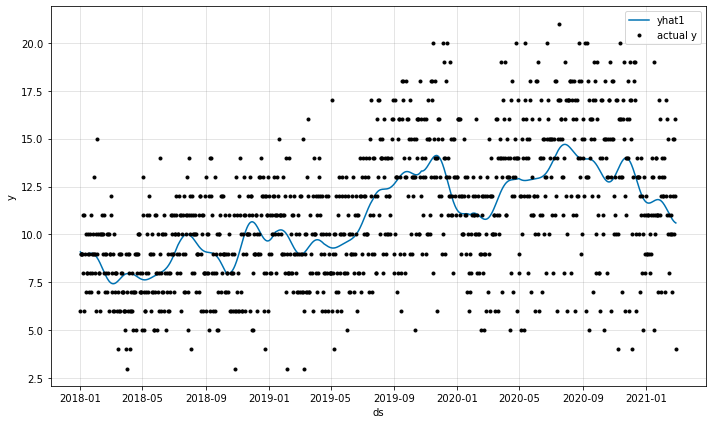

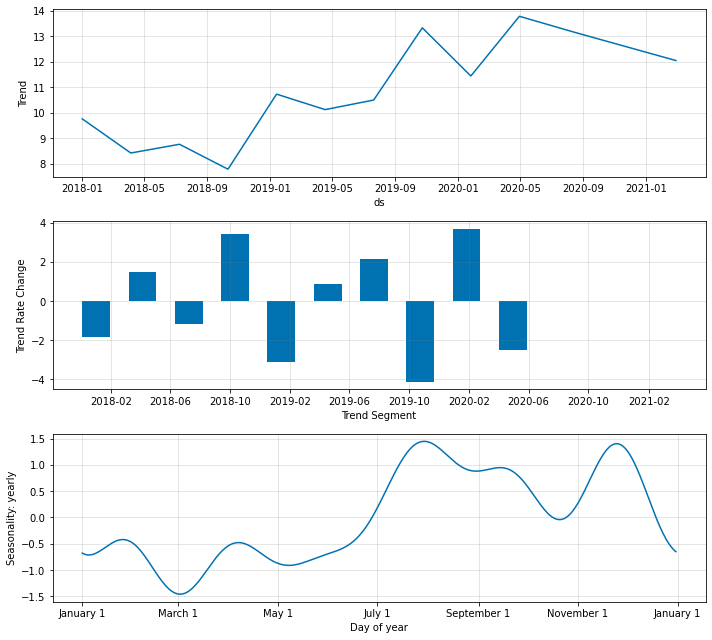

In [50]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

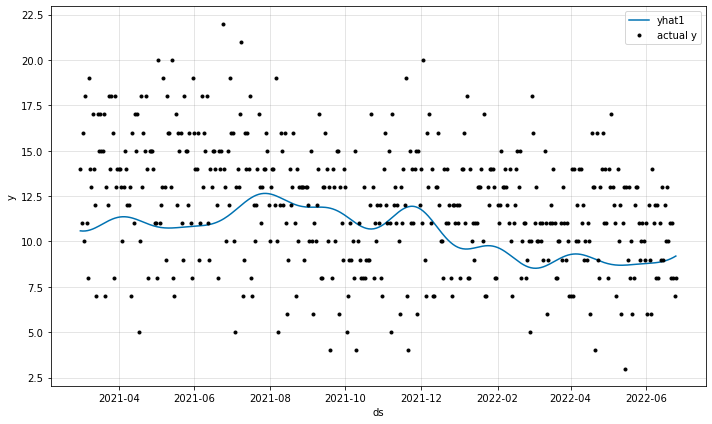

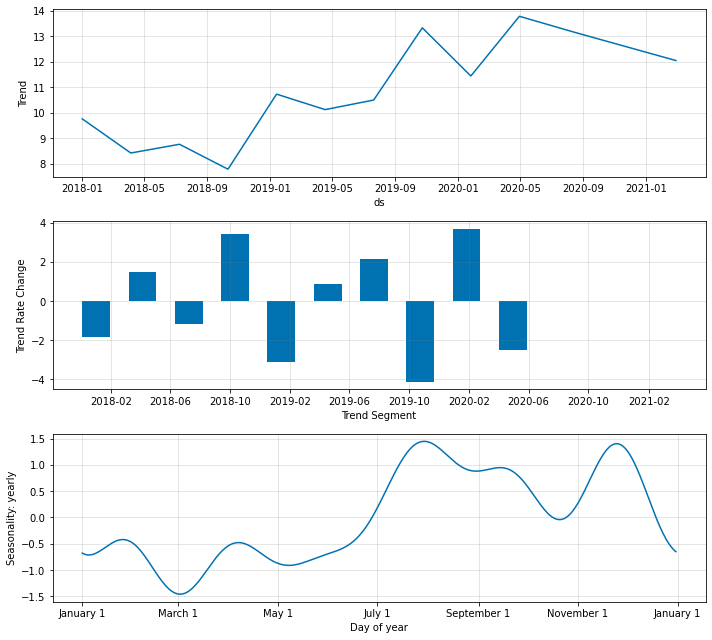

In [51]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()

WARNING - (py.warnings._showwarnmsg) - /Users/minjaering/opt/anaconda3/envs/minjaering/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



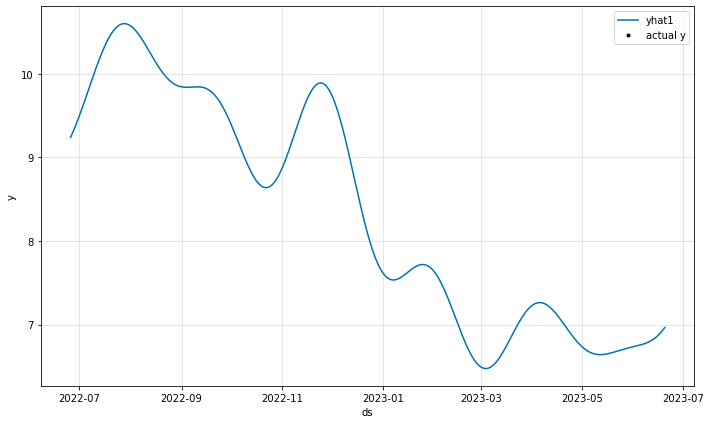

In [52]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

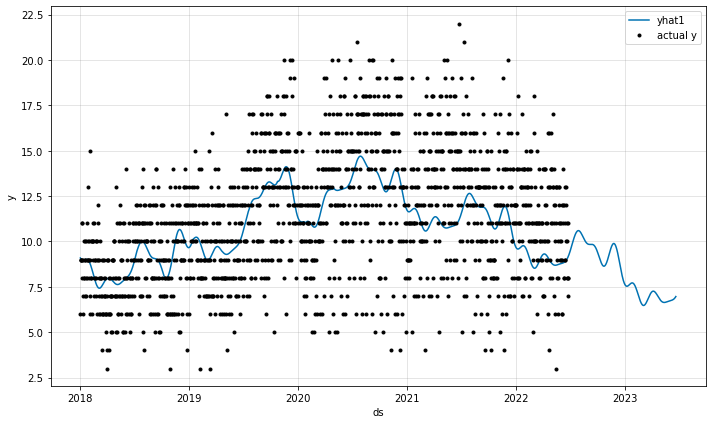

In [53]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)

In [54]:
col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 2.2246169771466935
MSE : 8.147969285788111
RMSE : 2.854464798484667
MAPE : 0.20186735469417985


In [55]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 2.9124745016770737
MSE : 12.78579028656775
RMSE : 3.5757223447252935
MAPE : 0.280261726823166


In [56]:
data2.describe()

,startpos1
count,1637.000000
mean,11.281002
std,3.487030
min,3.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,22.000000
